In [5]:
import numpy as np

import pylab
import matplotlib
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer
from qiskit.opflow import X, Z, Y, I
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.circuit.library import TwoLocal, QAOAAnsatz

from qiskit.algorithms.optimizers import ADAM, CG, COBYLA, L_BFGS_B, GradientDescent, NELDER_MEAD, \
                                            NFT, POWELL, SLSQP, SPSA, TNC


#Imports Functions for Building Hamiltonains
%run Utils.ipynb
np.set_printoptions(formatter={'float': '{:0.3f}'.format})

In [6]:
target_hamiltonian = (Z^Z) + (Z^I) + (I^Z)
mixer_hamiltonian = X^X
complete_hamiltonian = mixer_hamiltonian + target_hamiltonian

print(target_hamiltonian)
print(mixer_hamiltonian)

1.0 * ZZ
+ 1.0 * ZI
+ 1.0 * IZ
XX


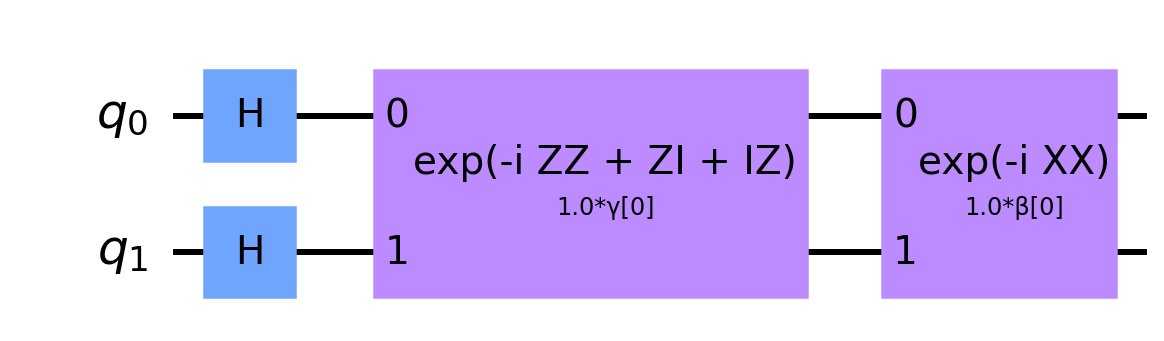

In [7]:
ansatz = QAOAAnsatz(cost_operator= target_hamiltonian, 
                    reps=1, 
                    initial_state=None, 
                    mixer_operator= mixer_hamiltonian, 
                    name='QAOA')

%matplotlib inline
ansatz.decompose().draw(output = "mpl", scale = 3)

In [8]:
vqe = VQE(ansatz, quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))

In [11]:
def energy(x, y):
    return vqe.get_energy_evaluation(complete_hamiltonian)([x,y])

quality = 30
r = 10

x_axis = np.linspace(-r, r, quality)
y_axis = np.linspace(-r, r, quality)

x_axis, y_axis = np.meshgrid(x_axis, y_axis)

z_axis = np.zeros([quality, quality], dtype=float)

for i in range(quality):
    for j in range(quality):
        z_axis[i,j] = f(x_axis[i,j], y_axis[i,j])


<IPython.core.display.Javascript object>


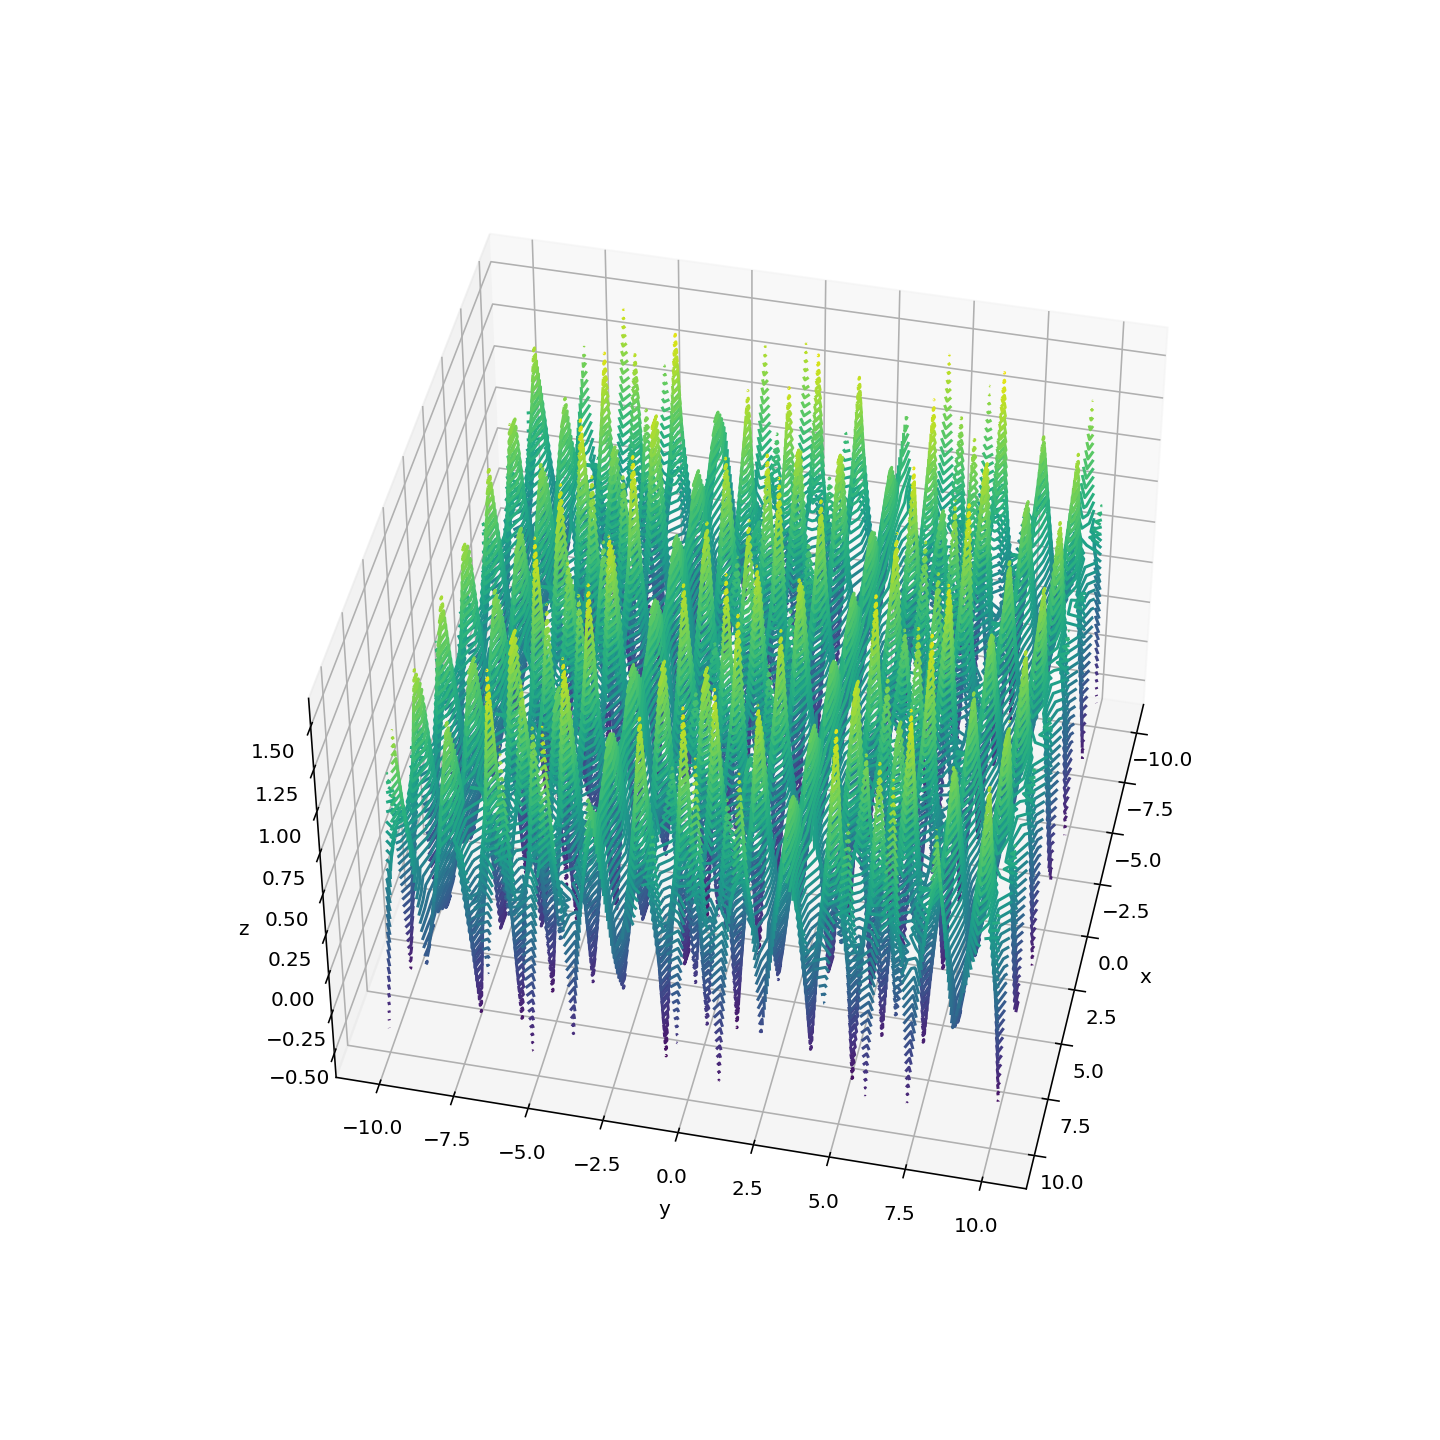

In [10]:
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (10, 10)
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.contour3D(x_axis, y_axis, z_axis, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');